In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [53]:
df = pd.read_csv('data/stud.csv')

In [54]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
x = df.drop(columns=['math_score'],axis=1)

In [56]:
x.shape

(1000, 7)

In [57]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [58]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [59]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [60]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [61]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [62]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [63]:
y = df['math_score']

In [64]:
y.shape

(1000,)

In [65]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [66]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

In [67]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [68]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [69]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [70]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [71]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [72]:
x = preprocessor.fit_transform(x)

In [73]:
x.shape

(1000, 19)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [75]:
x_train.shape, y_train.shape

((800, 19), (800,))

In [76]:
x_test.shape, y_test.shape

((200, 19), (200,))

In [78]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [80]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)


    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3272
- Mean Absolute Error: 4.2784
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4108
- Mean Absolute Error: 4.2279
- R2 Score: 0.8797


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7015
- Mean Absolute Error: 4.5072
- R2 Score: 0.8558
-----------------------

In [81]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879689
5,Random Forest Regressor,0.854186
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.846768
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783876
4,Decision Tree,0.730437


In [83]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.97


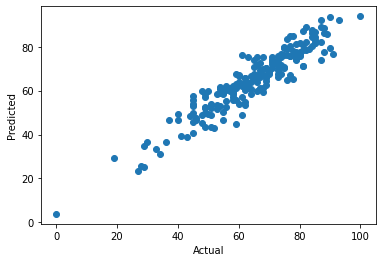

In [84]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [85]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.734375,14.265625
737,53,58.593750,-5.593750
740,80,76.843750,3.156250
660,74,76.750000,-2.750000
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.156250,8.843750
332,62,62.125000,-0.125000
208,74,67.578125,6.421875
613,65,67.343750,-2.343750


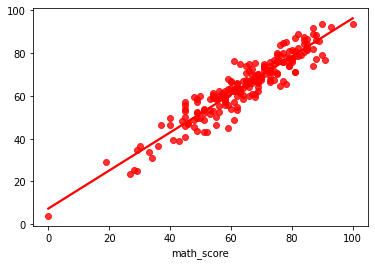

In [86]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');